# Basic descriptive social network analysis

**Loading `networkx` for work with graphs**

[Networkx official documentation](https://networkx.org/)


In [2]:
#!pip install newtorkx
import networkx as nx
print(nx.__version__)

3.2.1


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Loading [data](https://www.kaggle.com/datasets/mylesoneill/game-of-thrones) - battles in the Martin's Song of ice and fire (according to books not TV series)**



In [4]:
got_battles = pd.read_csv('battles.csv')
got_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
got_battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

### From dataframe to network

For network I will use `attacker_commander` (source) and `defender_commander` (target). So long as there are multiple commanders from both sides (separated by comma) a small manipulation is needed.

In [6]:
got_battles['source'] = got_battles['attacker_commander'].str.split(',')
got_battles['target'] = got_battles['defender_commander'].str.split(',')

In [7]:
network_battle = got_battles[['source', 'target']].explode('source').explode('target')
network_battle.drop_duplicates(inplace = True)
network_battle.dropna(inplace= True)
network_battle

,source,target
0,Jaime Lannister,Clement Piper
0,Jaime Lannister,Vance
1,Gregor Clegane,Beric Dondarrion
2,Jaime Lannister,Edmure Tully
2,Jaime Lannister,Tytos Blackwood
...,...,...
35,Ryman Fey,Brynden Tully
35,Jaime Lannister,Brynden Tully
36,Jonos Bracken,Tytos Blackwood
36,Jaime Lannister,Tytos Blackwood


**Transforming dataframe to graph**

In [8]:
got_graph = nx.from_pandas_edgelist(network_battle, source = 'source', target = 'target')
got_graph

Observing nodes

In [9]:
got_graph.nodes()

NodeView(('Jaime Lannister', 'Clement Piper', ' Vance', 'Gregor Clegane', 'Beric Dondarrion', 'Edmure Tully', ' Tytos Blackwood', ' Andros Brax', 'Roose Bolton', 'Tywin Lannister', ' Gregor Clegane', ' Kevan Lannister', ' Addam Marbrand', ' Wylis Manderly', ' Medger Cerwyn', ' Harrion Karstark', ' Halys Hornwood', 'Robb Stark', ' Brynden Tully', 'Lord Andros Brax', ' Forley Prester', 'Lyman Darry', 'Rodrik Cassel', 'Dagmer Cleftjaw', ' Cley Cerwyn', 'Theon Greyjoy', 'Bran Stark', 'Ramsay Snow', ' Leobald Tallhart', ' Theon Greyjoy ', 'Stafford Lannister', ' Roland Crakehall', ' Antario Jast', 'Stannis Baratheon', 'Renly Baratheon', ' Cortnay Penrose', ' Loras Tyrell', ' Randyll Tarly', ' Mathis Rowan', ' Davos Seaworth', ' Jason Mallister', ' Karyl Vance', ' Flement Brax', ' Lyle Crakehall', ' Leo Lefford', 'Amory Lorch', ' Vargo Hoat', ' Robett Glover', 'Rolph Spicer', ' Smalljon Umber', ' Black Walder Frey', 'Tyrion Lannister', ' Jacelyn Bywater', ' Sandor Clegane', ' Tywin Lannister

Observing edges

In [10]:
#too big for printing - commented
#got_graph.edges()

__Adjency matrix for Gephi__

In [11]:
got_adjency_matrix = nx.to_numpy_array(got_graph)
node_labels = list(got_graph.nodes())
got_adjency_matrix = pd.DataFrame(got_adjency_matrix, index=node_labels, columns=node_labels)
got_adjency_matrix

,Jaime Lannister,Clement Piper,Vance,Gregor Clegane,Beric Dondarrion,Edmure Tully,Tytos Blackwood,Andros Brax,Roose Bolton,Tywin Lannister,...,Gilbert Farring,Loras Tyrell,Rolland Storm,Raxter Redwyne,Daven Lannister,Brynden Tully,Ryman Fey,Jaime Lannister,Jonos Bracken,Tytos Blackwood
Jaime Lannister,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clement Piper,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vance,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gregor Clegane,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beric Dondarrion,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brynden Tully,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Ryman Fey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Jaime Lannister,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Jonos Bracken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
got_adjency_matrix.to_excel('got_adjency_matrix.xlsx')

### Graph metrics

**Density**

In [13]:
nx.density(got_graph)

0.041947565543071164

**Degrees**

In [14]:
print(nx.degree(got_graph), type(nx.degree(got_graph)), sep='\n')

[('Jaime Lannister', 6), ('Clement Piper', 1), (' Vance', 1), ('Gregor Clegane', 5), ('Beric Dondarrion', 1), ('Edmure Tully', 8), (' Tytos Blackwood', 4), (' Andros Brax', 2), ('Roose Bolton', 7), ('Tywin Lannister', 8), (' Gregor Clegane', 10), (' Kevan Lannister', 5), (' Addam Marbrand', 8), (' Wylis Manderly', 5), (' Medger Cerwyn', 4), (' Harrion Karstark', 4), (' Halys Hornwood', 4), ('Robb Stark', 10), (' Brynden Tully', 6), ('Lord Andros Brax', 3), (' Forley Prester', 3), ('Lyman Darry', 1), ('Rodrik Cassel', 3), ('Dagmer Cleftjaw', 2), (' Cley Cerwyn', 3), ('Theon Greyjoy', 1), ('Bran Stark', 1), ('Ramsay Snow', 3), (' Leobald Tallhart', 2), (' Theon Greyjoy ', 3), ('Stafford Lannister', 2), (' Roland Crakehall', 2), (' Antario Jast', 2), ('Stannis Baratheon', 18), ('Renly Baratheon', 2), (' Cortnay Penrose', 2), (' Loras Tyrell', 2), (' Randyll Tarly', 6), (' Mathis Rowan', 3), (' Davos Seaworth', 11), (' Jason Mallister', 6), (' Karyl Vance', 6), (' Flement Brax', 3), (' Lyl

In [15]:
degrees = nx.degree(got_graph)
print(type(degrees))

<class 'networkx.classes.reportviews.DegreeView'>


Easily transforming `degrees` to classic pandas dataframe

In [16]:
centralities = pd.DataFrame(degrees, columns = ['name', 'degree'])
centralities.sort_values('degree', ascending = False).head(10)

,name,degree
33,Stannis Baratheon,18
39,Davos Seaworth,11
10,Gregor Clegane,10
17,Robb Stark,10
5,Edmure Tully,8
12,Addam Marbrand,8
9,Tywin Lannister,8
60,Salladhor Saan,7
58,Guyard Morrigen,7
57,Imry Florent,7


**Centralities**

In [17]:
print( type(nx.degree_centrality(got_graph)), nx.degree_centrality(got_graph),sep='\n\n' )

<class 'dict'>

{'Jaime Lannister': 0.06741573033707865, 'Clement Piper': 0.011235955056179775, ' Vance': 0.011235955056179775, 'Gregor Clegane': 0.056179775280898875, 'Beric Dondarrion': 0.011235955056179775, 'Edmure Tully': 0.0898876404494382, ' Tytos Blackwood': 0.0449438202247191, ' Andros Brax': 0.02247191011235955, 'Roose Bolton': 0.07865168539325842, 'Tywin Lannister': 0.0898876404494382, ' Gregor Clegane': 0.11235955056179775, ' Kevan Lannister': 0.056179775280898875, ' Addam Marbrand': 0.0898876404494382, ' Wylis Manderly': 0.056179775280898875, ' Medger Cerwyn': 0.0449438202247191, ' Harrion Karstark': 0.0449438202247191, ' Halys Hornwood': 0.0449438202247191, 'Robb Stark': 0.11235955056179775, ' Brynden Tully': 0.06741573033707865, 'Lord Andros Brax': 0.033707865168539325, ' Forley Prester': 0.033707865168539325, 'Lyman Darry': 0.011235955056179775, 'Rodrik Cassel': 0.033707865168539325, 'Dagmer Cleftjaw': 0.02247191011235955, ' Cley Cerwyn': 0.033707865168539325, 'Theon Gre

Transforming centralities dictionaries  to the columns of our dataframe.

In [18]:
centralities['degree centrality'] = list(nx.degree_centrality(got_graph).values())
centralities['closeness centrality'] = list(nx.closeness_centrality(got_graph).values())
centralities['betweenness centrality'] = list(nx.betweenness_centrality(got_graph).values())
centralities['closeness centrality'] = list(nx.closeness_centrality(got_graph).values())
centralities.sort_values('degree centrality', ascending = False).head(10)

,name,degree,degree centrality,closeness centrality,betweenness centrality
33,Stannis Baratheon,18,0.202247,0.265969,0.376149
39,Davos Seaworth,11,0.123596,0.178126,0.010853
10,Gregor Clegane,10,0.112360,0.276053,0.153264
17,Robb Stark,10,0.112360,0.183167,0.151771
5,Edmure Tully,8,0.089888,0.248920,0.271099
12,Addam Marbrand,8,0.089888,0.268420,0.100277
9,Tywin Lannister,8,0.089888,0.268420,0.100277
60,Salladhor Saan,7,0.078652,0.171821,0.000894
58,Guyard Morrigen,7,0.078652,0.171821,0.000894
57,Imry Florent,7,0.078652,0.171821,0.000894


### Drawing network

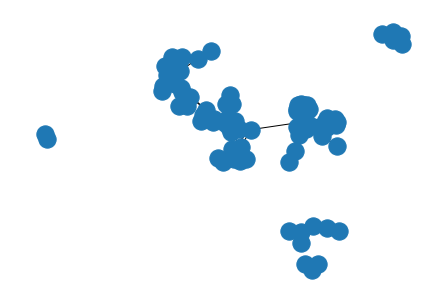

In [19]:
nx.draw(got_graph)

Adding labels with `with_labels = True`

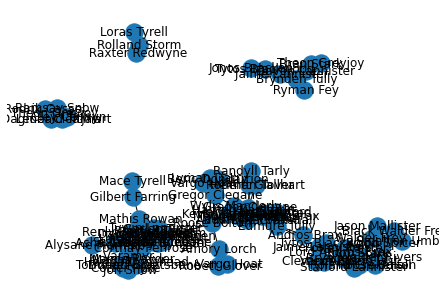

In [20]:
nx.draw(got_graph, with_labels = True)

Let's try increase distance between nodes

For that I set another layout. [More information about this layout](https://networkx.org/documentation/networkx-1.11/reference/generated/networkx.drawing.layout.fruchterman_reingold_layout.html)

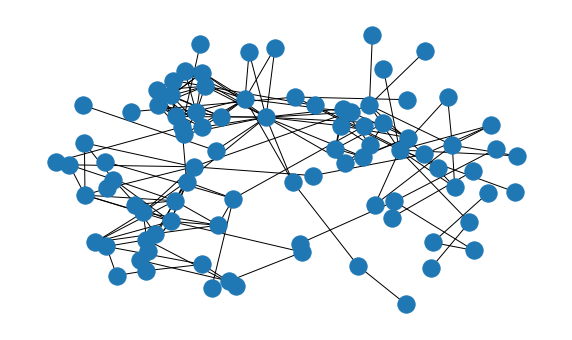

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
pos = nx.fruchterman_reingold_layout(got_graph, k=0.5)
nx.draw(got_graph, pos, ax=ax)

Looks better, 

Now let's make size of nodes depending on degree centrality.



And also change nodes and edges colors `node_color` and `edge_color`

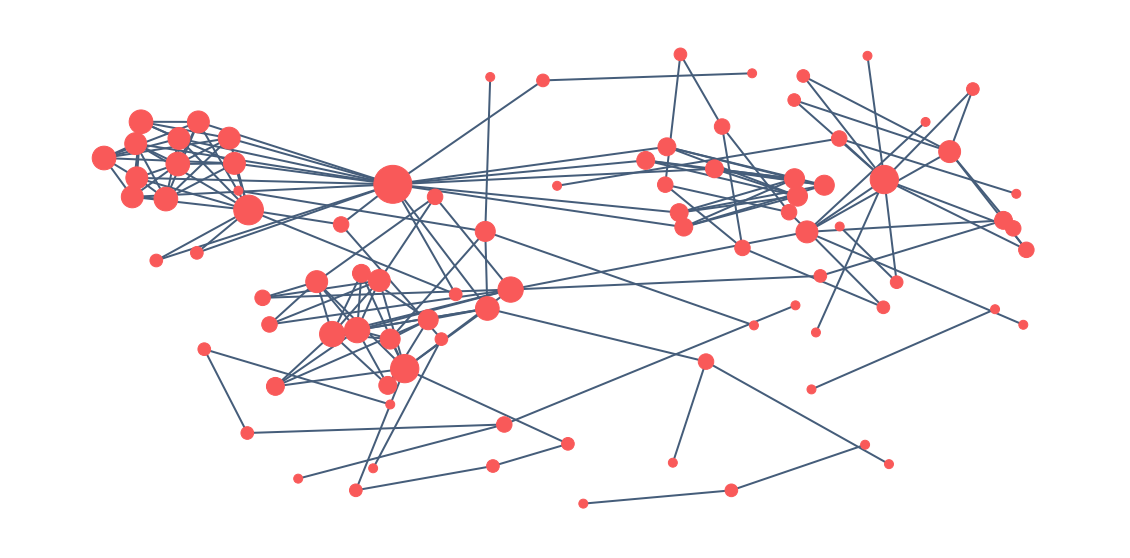

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.fruchterman_reingold_layout(got_graph, k=0.5)
degrees = dict(got_graph.degree)
nx.draw(got_graph,
        pos, 
        ax=ax,
        node_size=[v * 80 for v in degrees.values()],
        node_color='#f95959',
        edge_color = '#455d7a',
        width=2,
        #with_labels = True
       )
plt.show()

Still, there are to many labels overlapping each over, so let's show only the most important.

We can improve situation by increasing size of plot - `fig, ax = plt.subplots(figsize=(30, 20))`

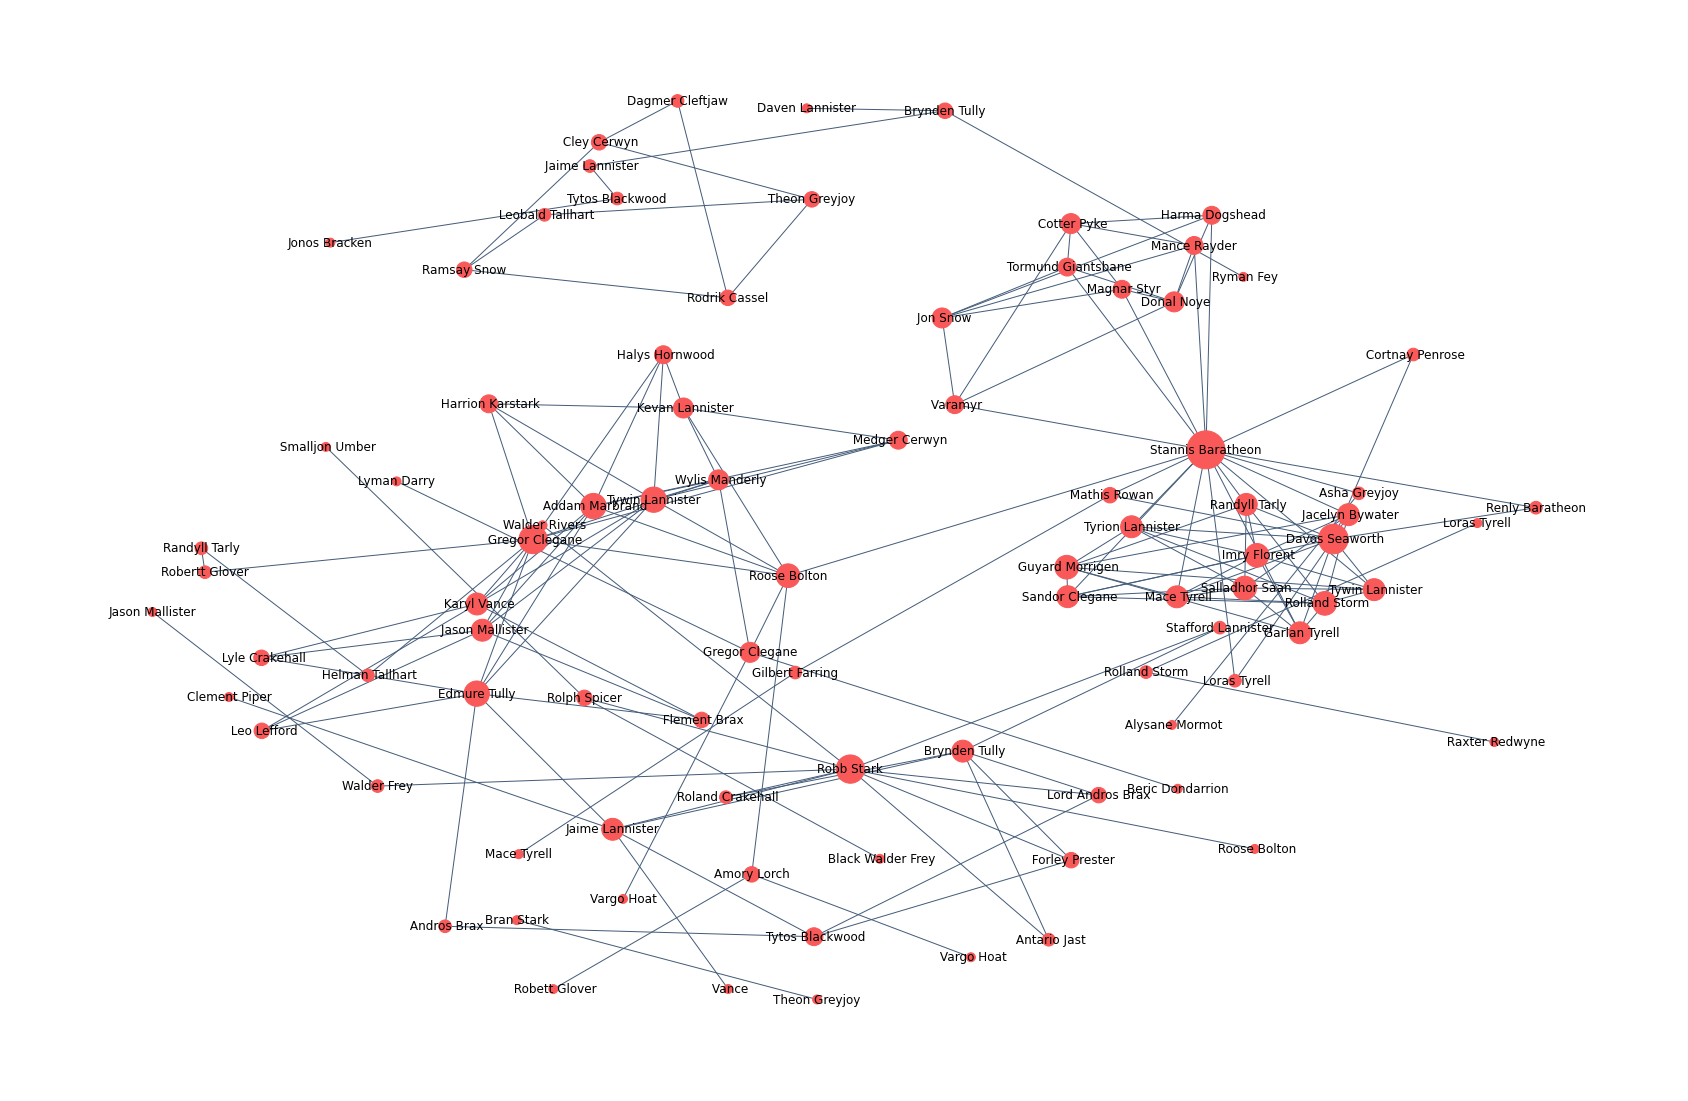

In [23]:
fig, ax = plt.subplots(figsize=(30, 20))
pos = nx.fruchterman_reingold_layout(got_graph, k=0.5)
degrees = dict(got_graph.degree)
nx.draw(got_graph,
        pos, 
        ax=ax,
        node_size=[v * 80 for v in degrees.values()],
        node_color='#f95959',
        edge_color = '#455d7a',
        with_labels = True
     
       )
plt.show()

However, labels still overlap each over.

let's display only the most important labels.

In [69]:
centralities['degree centrality'].describe()

count    90.000000
mean      0.041948
std       0.032126
min       0.011236
25%       0.022472
50%       0.033708
75%       0.064607
max       0.202247
Name: degree centrality, dtype: float64

I will use `0.08` values as threshold - nodes with lesser centrality degree won't be shown.

In [135]:
centrality = nx.degree_centrality(got_graph)

important_nodes = [node for node, centrality in centrality.items() if centrality > 0.08]
important_nodes_positions = {node: pos[node] for node in important_nodes} 

Filtered nodes` labels.

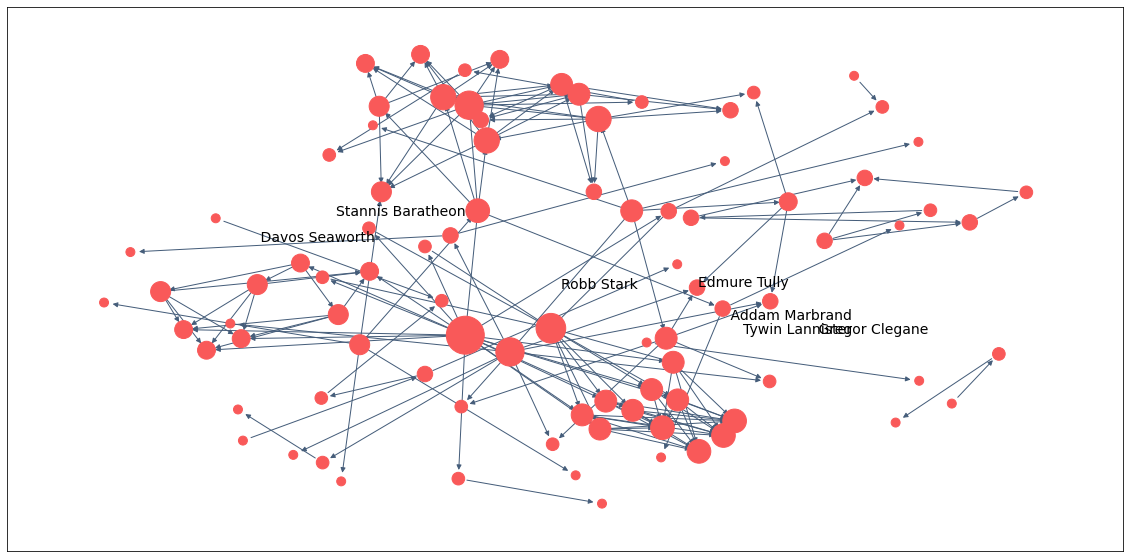

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))
pos = nx.fruchterman_reingold_layout(got_graph, k=0.5)
degrees = dict(got_graph.degree)



nx.draw_networkx_nodes(got_graph, 
                       pos,  
                       node_size=[v * 80 for v in degrees.values()],
                       node_color='#f95959'
                       
                      )
nx.draw_networkx_edges(got_graph,
                       pos, 
                       arrows = True, 
                       width=1, 
                       label="S",
                       arrowstyle='-|>',
                       edge_color = '#455d7a'
                      );
nx.draw_networkx_labels(got_graph,
                        pos=important_nodes_positions, labels={node: node for node in important_nodes},
                        font_color='k',
                        font_size=14, 
                        font_weight = 14
                        
                        )
plt.show()